Practica 2 - ejercicio 2

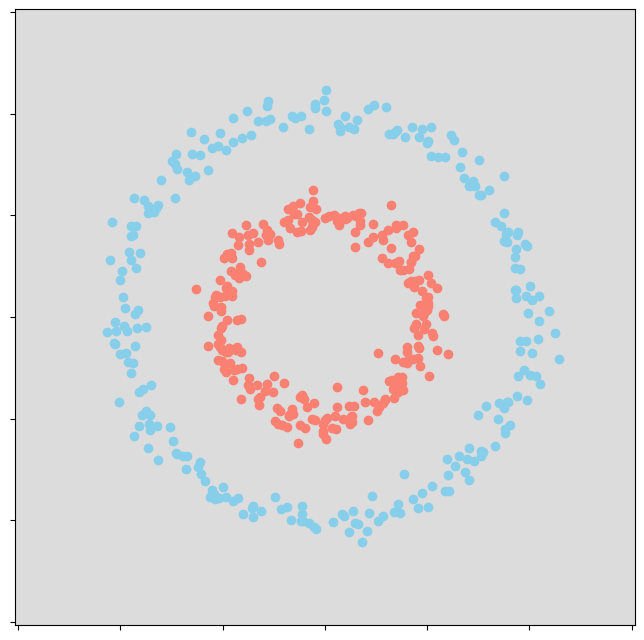

In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

#resolucion del mapa de prediccion
res = 100

#coordenadas del mapa

_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1,2)

_pY = np.zeros((res, res))+0.5

plt.figure(figsize=(8,8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
plt.tick_params(labelbottom = False, labelleft=False)

Step 0 / 1000  - Loss =  0.3799121  - ACC = 0.484
Step 25 / 1000  - Loss =  0.13458964  - ACC = 0.79
Step 50 / 1000  - Loss =  0.10828717  - ACC = 0.848
Step 75 / 1000  - Loss =  0.08896426  - ACC = 0.89
Step 100 / 1000  - Loss =  0.072441995  - ACC = 0.924
Step 125 / 1000  - Loss =  0.05798064  - ACC = 0.95
Step 150 / 1000  - Loss =  0.047113948  - ACC = 0.974
Step 175 / 1000  - Loss =  0.038601305  - ACC = 0.994
Step 200 / 1000  - Loss =  0.031758428  - ACC = 0.998
Step 225 / 1000  - Loss =  0.026493931  - ACC = 0.998
Step 250 / 1000  - Loss =  0.02230963  - ACC = 1.0
Step 275 / 1000  - Loss =  0.019138008  - ACC = 1.0
Step 300 / 1000  - Loss =  0.01669969  - ACC = 1.0
Step 325 / 1000  - Loss =  0.01469798  - ACC = 1.0
Step 350 / 1000  - Loss =  0.013076346  - ACC = 1.0
Step 375 / 1000  - Loss =  0.011764794  - ACC = 1.0
Step 400 / 1000  - Loss =  0.010675033  - ACC = 1.0
Step 425 / 1000  - Loss =  0.009770863  - ACC = 1.0
Step 450 / 1000  - Loss =  0.009004681  - ACC = 1.0
Step 475 

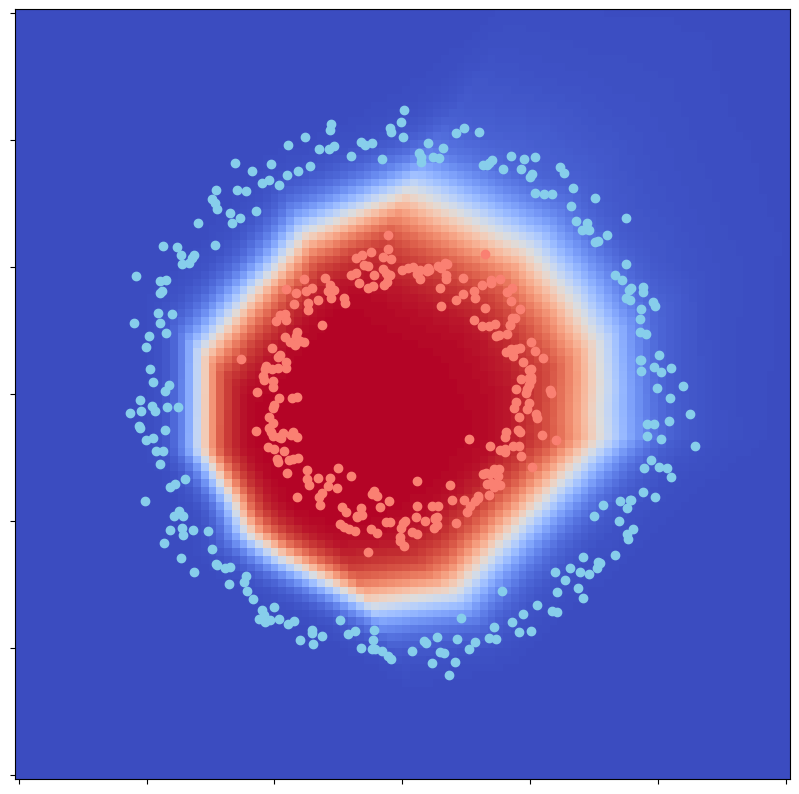

In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

#Definition
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
# W3 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_1')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

loss = tf.losses.mean_squared_error(pY, iY)

learning_rate = 0.05

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
n_steps = 1000
iPY = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  #iteramos n pases de entrenamiento.
  for step in range(n_steps):
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX:X, iY:Y})


    if step % 25 == 0:
      acc = np.mean(np.round(_pY) == Y)
      # Impresión de metricas
      print('Step', step, '/', n_steps, ' - Loss = ', _loss, ' - ACC =', acc)
      _pY = sess.run(pY, feed_dict={iX: _pX}).reshape(res, res)
      iPY.append(_pY)

ims = []
fig = plt.figure(figsize=(10,10))
print("---Generando animación ----")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  plt.tick_params(labelbottom = False, labelleft=False)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())